# Random Basis Functions
### Loss = Mean Squared Error
### No utilizzo di Libreria

In [1]:
import sys
sys.path.append('../../code')
import deepxde as dde
import matplotlib.pyplot as plt
import numpy as np
# Import tf if using backend tensorflow.compat.v1 or tensorflow
from deepxde.backend import tf
#import deepxde

Using backend: tensorflow
Other supported backends: tensorflow.compat.v1, pytorch, jax, paddle.
paddle supports more examples now and is recommended.


#### Validation loss rispetto diversi valori di M

In [2]:
from keras.models import Sequential
from keras.layers import Dense

pi = np.pi
history = {}
mm = [100, 200, 400, 600]
rr = [0.5, 1, 2, 5 , 10]
for M in mm:
#M = 100
    Rm = 2
    d=1

    weight = np.zeros((M,d))
    biases = np.zeros((M,1))

    for i in range(M):
        for j in range(d):
            weight[i][j]= np.random.uniform(low=-Rm, high=Rm)
        biases[i] = np.random.uniform(low=-0.0005, high=0.0005)

    def phi(x):
        bias = np.repeat(biases, np.shape(x)[1], axis = -1)
        out = np.sin(weight@x + bias)
        return out

    train = np.array([np.linspace(-1, 1, 20)])
    test = np.array([np.linspace(-1, 1, 7)])

    def func(x):
        return np.sin(np.pi * x)
        #return np.sin(3*pi*x + 3*pi/20)*np.cos(2*pi*x + pi/10) + 2
        
    y_train = func(train).T

    y_test = func(test).T

    k_init = tf.keras.initializers.RandomUniform(minval=-Rm, maxval=Rm)
    b_init = tf.keras.initializers.RandomUniform(minval=-0.0005, maxval=0.0005)
    def custom_activation(x):
        return tf.sin(x)

    model = Sequential()
    #layer1 = Dense(M, activation=custom_activation)

    model.add(Dense(M, activation=custom_activation, input_dim=d, kernel_initializer=k_init,bias_initializer=b_init, trainable=False))
    model.add(Dense(1))
    model.compile(loss=tf.keras.losses.MeanSquaredError(), optimizer='adam', 
                    metrics=[tf.keras.losses.MeanAbsoluteError(reduction="auto", name="mean_absolute_error"),'accuracy'])

    callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=100)
    history[M] = model.fit(train.T, y_train, validation_data = (test.T,y_test), epochs=5000, batch_size=64, callbacks=[callback])

Epoch 1/5000
1/1 [==============================] - 1s 500ms/step - loss: 0.1624 - mean_absolute_error: 0.3570 - accuracy: 0.0000e+00 - val_loss: 0.2267 - val_mean_absolute_error: 0.4061 - val_accuracy: 0.1429
Epoch 2/5000
1/1 [==============================] - 0s 28ms/step - loss: 0.1605 - mean_absolute_error: 0.3546 - accuracy: 0.0000e+00 - val_loss: 0.2236 - val_mean_absolute_error: 0.4034 - val_accuracy: 0.1429
Epoch 3/5000
1/1 [==============================] - 0s 29ms/step - loss: 0.1586 - mean_absolute_error: 0.3526 - accuracy: 0.0000e+00 - val_loss: 0.2200 - val_mean_absolute_error: 0.4011 - val_accuracy: 0.1429
Epoch 4/5000
1/1 [==============================] - 0s 28ms/step - loss: 0.1567 - mean_absolute_error: 0.3506 - accuracy: 0.0000e+00 - val_loss: 0.2166 - val_mean_absolute_error: 0.3987 - val_accuracy: 0.1429
Epoch 5/5000
1/1 [==============================] - 0s 29ms/step - loss: 0.1548 - mean_absolute_error: 0.3487 - accuracy: 0.0000e+00 - val_loss: 0.2136 - val_mean_

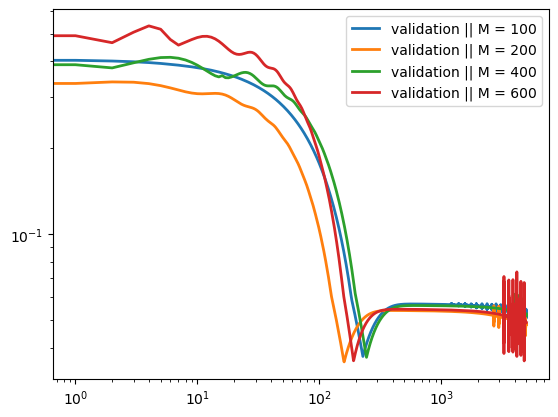

In [3]:
for M in mm:
    bc     = history[M].history['mean_absolute_error']
    bc_val     = history[M].history['val_mean_absolute_error']

    #plt.loglog(range(np.shape(bc)[0]),bc, linewidth=2, label='training || M = ' + str(M))
    plt.loglog(range(np.shape(bc_val)[0]),bc_val, linewidth=2, label='validation || M = ' + str(M))
plt.legend()
plt.show()

#### Validation loss rispetto diversi valori di Rm

In [4]:
from keras.models import Sequential
from keras.layers import Dense

pi = np.pi
history = {}
mm = [100, 200, 400, 600]
rr = [0.5, 1, 2, 5 , 10]
for Rm in rr:
    M = 200
    #Rm = 2
    d=1

    weight = np.zeros((M,d))
    biases = np.zeros((M,1))

    for i in range(M):
        for j in range(d):
            weight[i][j]= np.random.uniform(low=-Rm, high=Rm)
        biases[i] = np.random.uniform(low=-0.0005, high=0.0005)

    def phi(x):
        bias = np.repeat(biases, np.shape(x)[1], axis = -1)
        out = np.sin(weight@x + bias)
        return out

    train = np.array([np.linspace(-1, 1, 20)])
    test = np.array([np.linspace(-1, 1, 7)])

    def func(x):
        return np.sin(np.pi * x)
        #return np.sin(3*pi*x + 3*pi/20)*np.cos(2*pi*x + pi/10) + 2
        
    y_train = func(train).T

    y_test = func(test).T

    k_init = tf.keras.initializers.RandomUniform(minval=-Rm, maxval=Rm)
    b_init = tf.keras.initializers.RandomUniform(minval=-0.0005, maxval=0.0005)
    def custom_activation(x):
        return tf.sin(x)

    model = Sequential()
    #layer1 = Dense(M, activation=custom_activation)

    model.add(Dense(M, activation=custom_activation, input_dim=d, kernel_initializer=k_init,bias_initializer=b_init, trainable=False))
    model.add(Dense(1))
    model.compile(loss=tf.keras.losses.MeanSquaredError(), optimizer='adam', 
                    metrics=[tf.keras.losses.MeanAbsoluteError(reduction="auto", name="mean_absolute_error"),'accuracy'])

    callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=100)
    history[Rm] = model.fit(train.T, y_train, validation_data = (test.T,y_test), epochs=3000, batch_size=64, callbacks=[callback])

Epoch 1/3000
1/1 [==============================] - 1s 511ms/step - loss: 0.4451 - mean_absolute_error: 0.5866 - accuracy: 0.0000e+00 - val_loss: 0.3828 - val_mean_absolute_error: 0.4949 - val_accuracy: 0.1429
Epoch 2/3000
1/1 [==============================] - 0s 26ms/step - loss: 0.4179 - mean_absolute_error: 0.5702 - accuracy: 0.0000e+00 - val_loss: 0.3636 - val_mean_absolute_error: 0.4946 - val_accuracy: 0.1429
Epoch 3/3000
1/1 [==============================] - 0s 28ms/step - loss: 0.3925 - mean_absolute_error: 0.5539 - accuracy: 0.0000e+00 - val_loss: 0.3467 - val_mean_absolute_error: 0.4944 - val_accuracy: 0.1429
Epoch 4/3000
1/1 [==============================] - 0s 26ms/step - loss: 0.3691 - mean_absolute_error: 0.5376 - accuracy: 0.0000e+00 - val_loss: 0.3320 - val_mean_absolute_error: 0.4943 - val_accuracy: 0.1429
Epoch 5/3000
1/1 [==============================] - 0s 26ms/step - loss: 0.3477 - mean_absolute_error: 0.5214 - accuracy: 0.0000e+00 - val_loss: 0.3195 - val_mean_

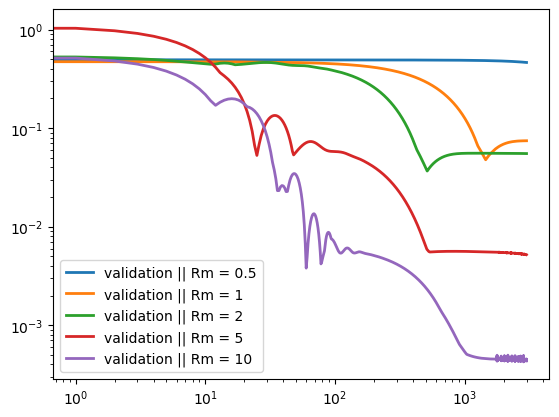

In [5]:
for Rm in rr:
    bc     = history[Rm].history['mean_absolute_error']
    bc_val     = history[Rm].history['val_mean_absolute_error']

    #plt.loglog(range(np.shape(bc)[0]),bc, linewidth=2, label='training || Rm = ' + str(Rm))
    plt.loglog(range(np.shape(bc_val)[0]),bc_val, linewidth=2, label='validation || Rm = ' + str(Rm))
plt.legend()
plt.show()

In [19]:
M = 200
Rm = 5
d=1

weight = np.zeros((M,d))
biases = np.zeros((M,1))

for i in range(M):
    for j in range(d):
        weight[i][j]= np.random.uniform(low=-Rm, high=Rm)
    biases[i] = np.random.uniform(low=-0.0005, high=0.0005)

def phi(x):
    bias = np.repeat(biases, np.shape(x)[1], axis = -1)
    out = np.sin(weight@x + bias)
    return out

train = np.array([np.linspace(-1, 1, 20)])
test = np.array([np.linspace(-1, 1, 7)])

def func(x):
    return np.sin(np.pi * x)
    #return np.sin(3*pi*x + 3*pi/20)*np.cos(2*pi*x + pi/10) + 2
    
y_train = func(train).T

y_test = func(test).T

k_init = tf.keras.initializers.RandomUniform(minval=-Rm, maxval=Rm)
b_init = tf.keras.initializers.RandomUniform(minval=-0.0005, maxval=0.0005)
def custom_activation(x):
    return tf.sin(x)

model = Sequential()
#layer1 = Dense(M, activation=custom_activation)

model.add(Dense(M, activation=custom_activation, input_dim=d, kernel_initializer=k_init,bias_initializer=b_init, trainable=False))
model.add(Dense(1))
model.compile(loss=tf.keras.losses.MeanSquaredError(), optimizer='adam', 
                metrics=[tf.keras.losses.MeanAbsoluteError(reduction="auto", name="mean_absolute_error"),'accuracy'])

callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=100)
history = model.fit(train.T, y_train, validation_data = (test.T,y_test), epochs=3000, batch_size=64, callbacks=[callback])

Epoch 1/3000
1/1 [==============================] - 0s 408ms/step - loss: 0.0242 - mean_absolute_error: 0.1265 - accuracy: 0.0000e+00 - val_loss: 0.0263 - val_mean_absolute_error: 0.1186 - val_accuracy: 0.1429
Epoch 2/3000
1/1 [==============================] - 0s 28ms/step - loss: 0.0110 - mean_absolute_error: 0.0721 - accuracy: 0.0000e+00 - val_loss: 0.0176 - val_mean_absolute_error: 0.1061 - val_accuracy: 0.1429
Epoch 3/3000
1/1 [==============================] - 0s 35ms/step - loss: 0.0099 - mean_absolute_error: 0.0780 - accuracy: 0.0000e+00 - val_loss: 0.0142 - val_mean_absolute_error: 0.0971 - val_accuracy: 0.1429
Epoch 4/3000
1/1 [==============================] - 0s 39ms/step - loss: 0.0121 - mean_absolute_error: 0.0932 - accuracy: 0.0000e+00 - val_loss: 0.0124 - val_mean_absolute_error: 0.0925 - val_accuracy: 0.1429
Epoch 5/3000
1/1 [==============================] - 0s 41ms/step - loss: 0.0130 - mean_absolute_error: 0.0984 - accuracy: 0.0000e+00 - val_loss: 0.0112 - val_mean_

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_31 (Dense)            (None, 200)               400       
                                                                 
 dense_32 (Dense)            (None, 1)                 201       
                                                                 
Total params: 601
Trainable params: 201
Non-trainable params: 400
_________________________________________________________________
None


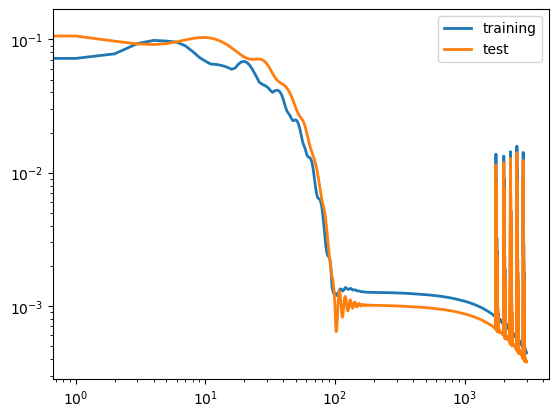

In [20]:
print(model.summary())
bc     = history.history['mean_absolute_error']
bc_val     = history.history['val_mean_absolute_error']

plt.loglog(range(np.shape(bc)[0]),bc, linewidth=2, label='training')
plt.loglog(range(np.shape(bc_val)[0]),bc_val, linewidth=2, label='test')
plt.legend()
plt.show()

4/4 [==============================] - 0s 1ms/step


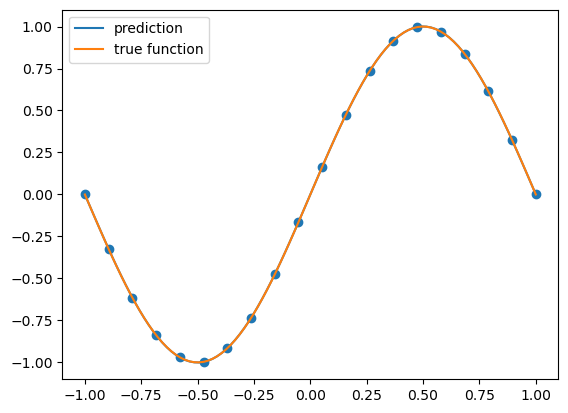

In [21]:
val = np.linspace(-1, 1, 100)

y_pred = model.predict(val)
plt.plot(val, y_pred, label='prediction')
plt.plot(val, func(val), label='true function')
plt.scatter(train, y_train)
plt.legend()

# Deepxde
### Poisson 1D: soluzione = $sin(\pi\,x)$

In [9]:
import sys
sys.path.append('../../code')
import deepxde as dde
import matplotlib.pyplot as plt
import numpy as np
# Import tf if using backend tensorflow.compat.v1 or tensorflow
from deepxde.backend import tf

In [10]:
def pde(x, y):
    dy_xx = dde.grad.hessian(y, x)
    # Use tf.sin for backend tensorflow.compat.v1 or tensorflow
    return -dy_xx - np.pi ** 2 * tf.sin(np.pi * x)
    #return -dy_xx - 13*pi**2*tf.sin(3*pi*x + 3*pi/20)*tf.cos(2*pi*x + pi/10) - 12*pi**2*tf.cos(3*pi*x + 3*pi/20)*tf.sin(2*pi*x + pi/10)

def boundary(x, on_boundary):
    return on_boundary

def func(x):
    return np.sin(np.pi * x)
    #return np.sin(3*pi*x + 3*pi/20)*np.cos(2*pi*x + pi/10) + 2

geom = dde.geometry.Interval(-1, 1)
bc = dde.icbc.DirichletBC(geom, func, boundary)
data = dde.data.PDE(geom, pde, bc, 16, 2, solution=func, num_test=100)

##### Utilizzo del solo layer delle random feature

In [11]:
M =200
layer_size = [1] + [M]  +  [1]

activation = ["sin", 'linear']

initializer = "Glorot uniform"

net = dde.nn.FNN_copy(layer_size, activation, initializer, Rm=10)

model = dde.Model(data, net)
model.compile("adam", lr=0.001, metrics=["l2 relative error"])

losshistory, train_state = model.train(iterations=10000)

Compiling model...
'compile' took 0.000815 s

Training model...



c:\Users\Marco\anaconda3\lib\site-packages\keras\initializers\initializers_v2.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


[2]
[0, 2]
[<tf.Tensor 'sub:0' shape=(20, 1) dtype=float32>]
[2]
[0, 2]
[<tf.Tensor 'sub:0' shape=(20, 1) dtype=float32>]
[2]
[0, 2]
[<tf.Tensor 'sub:0' shape=(102, 1) dtype=float32>]
Step      Train loss              Test loss               Test metric   
0         [4.33e+01, 4.52e+01]    [4.89e+01, 4.52e+01]    [1.18e+00]    
1000      [4.35e+01, 1.97e-04]    [4.91e+01, 1.97e-04]    [9.97e-01]    
2000      [4.35e+01, 1.96e-04]    [4.91e+01, 1.96e-04]    [9.97e-01]    
3000      [4.34e+01, 1.96e-04]    [4.91e+01, 1.96e-04]    [9.96e-01]    
4000      [4.34e+01, 1.96e-04]    [4.91e+01, 1.96e-04]    [9.96e-01]    
5000      [4.34e+01, 1.96e-04]    [4.90e+01, 1.96e-04]    [9.96e-01]    
6000      [4.33e+01, 1.95e-04]    [4.90e+01, 1.95e-04]    [9.95e-01]    
7000      [4.32e+01, 1.94e-04]    [4.88e+01, 1.94e-04]    [9.94e-01]    
8000      [4.30e+01, 1.93e-04]    [4.86e+01, 1.93e-04]    [9.91e-01]    
9000      [4.27e+01, 1.92e-04]    [4.83e+01, 1.92e-04]    [9.88e-01]    
10000     [4.

Saving loss history to c:\Users\Marco\Documents\GitHub\pacs\code\my_ex\loss.dat ...
Saving training data to c:\Users\Marco\Documents\GitHub\pacs\code\my_ex\train.dat ...
Saving test data to c:\Users\Marco\Documents\GitHub\pacs\code\my_ex\test.dat ...


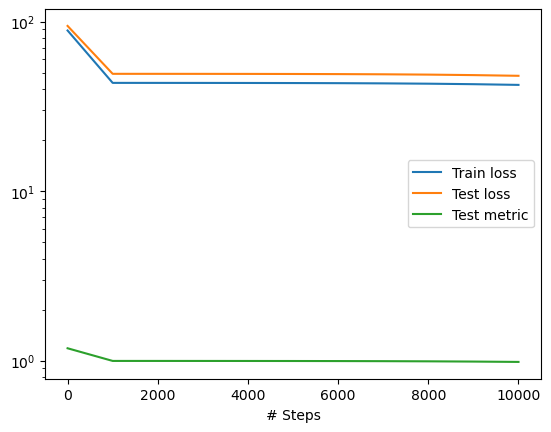

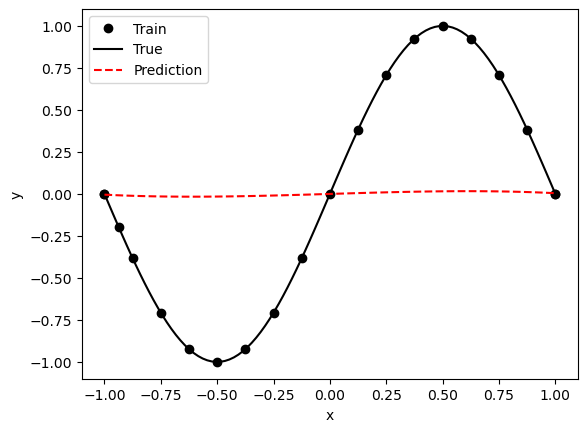

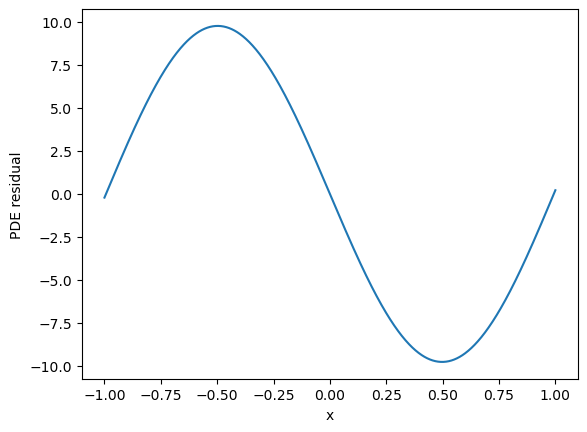

In [12]:
dde.saveplot(losshistory, train_state, issave=True, isplot=True)

x = geom.uniform_points(1000, True)
y = model.predict(x, operator=pde)
plt.figure()
plt.plot(x, y)
plt.xlabel("x")
plt.ylabel("PDE residual")
plt.show()

#### Random feature layer + ''piccolo layer libero''

In [13]:
M =200
layer_size = [1] + [M]  + [5] + [1]

activation = ["sin", 'sin', 'linear']

initializer = "Glorot uniform"

net = dde.nn.FNN_copy(layer_size, activation, initializer, Rm=10)

model = dde.Model(data, net)
model.compile("adam", lr=0.001, metrics=["l2 relative error"])

losshistory, train_state = model.train(iterations=10000)

Compiling model...
'compile' took 0.000993 s

Training model...

[2]
[0, 2]
[<tf.Tensor 'sub:0' shape=(20, 1) dtype=float32>]
[2]
[0, 2]
[<tf.Tensor 'sub:0' shape=(20, 1) dtype=float32>]
[2]
[0, 2]
[<tf.Tensor 'sub:0' shape=(102, 1) dtype=float32>]
Step      Train loss              Test loss               Test metric   
0         [4.36e+01, 2.56e-01]    [4.93e+01, 2.56e-01]    [1.11e+00]    
1000      [5.33e-04, 2.01e-11]    [4.32e-04, 2.01e-11]    [7.10e-04]    
2000      [5.33e-04, 1.96e-10]    [4.32e-04, 1.96e-10]    [7.09e-04]    
3000      [5.32e-04, 3.06e-07]    [4.31e-04, 3.06e-07]    [7.85e-04]    
4000      [5.31e-04, 2.34e-05]    [4.32e-04, 2.34e-05]    [1.65e-03]    
5000      [5.30e-04, 2.77e-04]    [4.41e-04, 2.77e-04]    [4.63e-03]    
6000      [5.26e-04, 5.82e-07]    [4.25e-04, 5.82e-07]    [6.62e-04]    
7000      [5.23e-04, 1.02e-06]    [4.21e-04, 1.02e-06]    [6.58e-04]    
8000      [5.17e-04, 8.89e-08]    [4.18e-04, 8.89e-08]    [6.75e-04]    
9000      [5.10e-04, 

Saving loss history to c:\Users\Marco\Documents\GitHub\pacs\code\my_ex\loss.dat ...
Saving training data to c:\Users\Marco\Documents\GitHub\pacs\code\my_ex\train.dat ...
Saving test data to c:\Users\Marco\Documents\GitHub\pacs\code\my_ex\test.dat ...


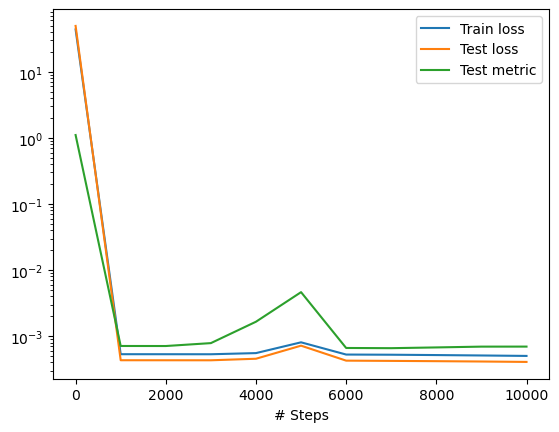

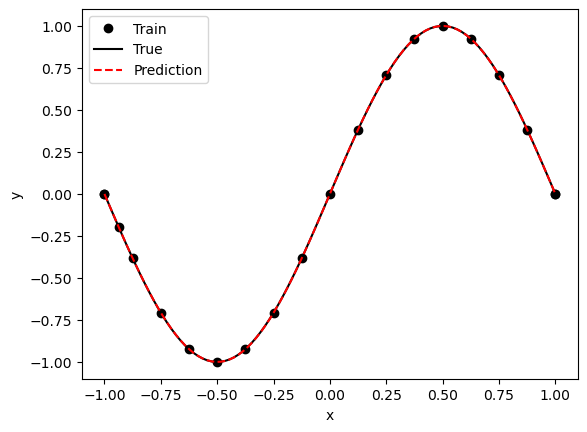

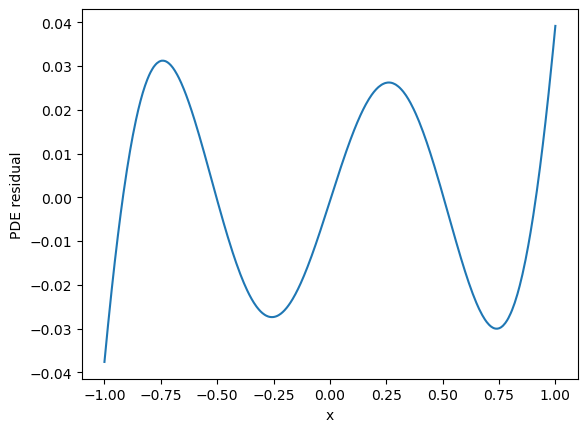

In [14]:
dde.saveplot(losshistory, train_state, issave=True, isplot=True)

x = geom.uniform_points(1000, True)
y = model.predict(x, operator=pde)
plt.figure()
plt.plot(x, y)
plt.xlabel("x")
plt.ylabel("PDE residual")
plt.show()

## Poisson 1D: soluzione = $sin(3\pi\,x + \frac{3\pi}{20}) * cos(2\pi\,x + \frac{\pi}{10}) + 2$
#### dominio ristretto [-0.8, 0]

In [15]:
def pde(x, y):
    dy_xx = dde.grad.hessian(y, x)
    # Use tf.sin for backend tensorflow.compat.v1 or tensorflow
    #return -dy_xx - np.pi ** 2 * tf.sin(np.pi * x)
    return -dy_xx - 13*pi**2*tf.sin(3*pi*x + 3*pi/20)*tf.cos(2*pi*x + pi/10) - 12*pi**2*tf.cos(3*pi*x + 3*pi/20)*tf.sin(2*pi*x + pi/10)

def boundary(x, on_boundary):
    return on_boundary

def func(x):
    #return np.sin(np.pi * x)
    return np.sin(3*pi*x + 3*pi/20)*np.cos(2*pi*x + pi/10) + 2

geom = dde.geometry.Interval(-0.8, 0)
bc = dde.icbc.DirichletBC(geom, func, boundary)
num_points = 18
val_points = 100
data = dde.data.PDE(geom, pde, bc, num_points, 2, solution=func, num_test=val_points)

Compiling model...
'compile' took 0.000423 s

Training model...

[2]
[0, 2]
[<tf.Tensor 'sub_1:0' shape=(22, 1) dtype=float32>]
[2]
[0, 2]
[<tf.Tensor 'sub_1:0' shape=(22, 1) dtype=float32>]
[2]
[0, 2]
[<tf.Tensor 'sub_1:0' shape=(102, 1) dtype=float32>]
Step      Train loss              Test loss               Test metric   
0         [8.36e+03, 4.80e+01]    [7.59e+03, 4.80e+01]    [9.78e-01]    
1000      [3.94e+03, 1.21e+01]    [3.31e+03, 1.21e+01]    [5.61e-01]    
2000      [6.72e+01, 9.77e-02]    [5.16e+01, 9.77e-02]    [4.86e-02]    
3000      [1.59e+01, 2.56e-03]    [1.06e+01, 2.56e-03]    [7.42e-03]    
4000      [6.59e+00, 2.32e-02]    [4.03e+00, 2.32e-02]    [1.75e-02]    
5000      [2.36e+00, 9.11e-03]    [1.10e+00, 9.11e-03]    [1.02e-02]    
6000      [1.05e+00, 2.38e-03]    [5.20e-01, 2.38e-03]    [4.83e-03]    
7000      [5.34e-01, 6.90e-04]    [2.99e-01, 6.90e-04]    [2.58e-03]    
8000      [4.49e-01, 5.76e-04]    [3.27e-01, 5.76e-04]    [3.04e-03]    
9000      [2.72

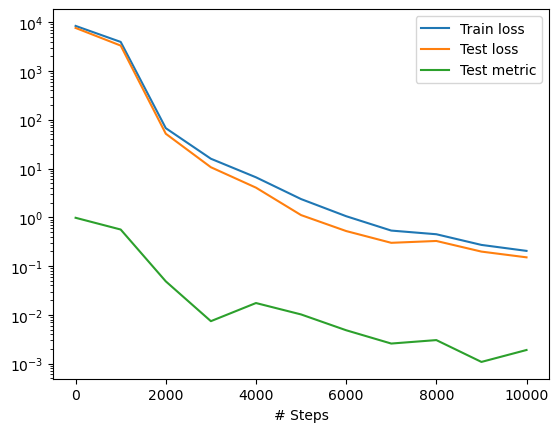

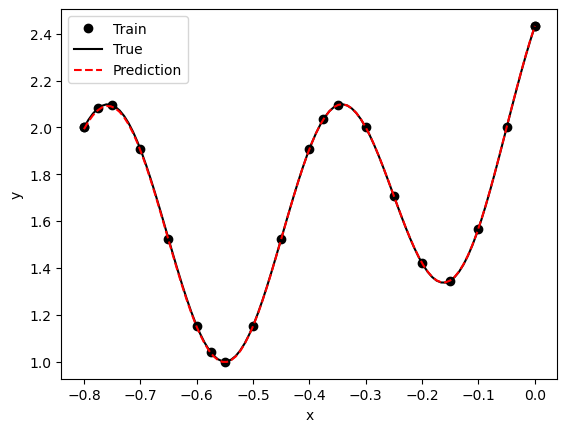

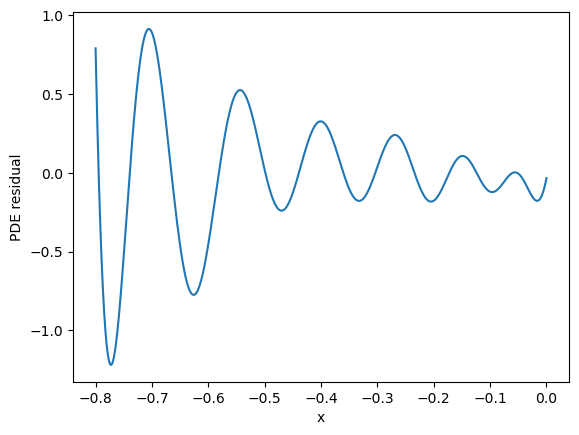

In [16]:
M =200
layer_size = [1] + [M]  + [20] + [1]

activation = ["sin", 'tanh', 'linear']

initializer = "Glorot uniform"

net = dde.nn.FNN_copy(layer_size, activation, initializer, Rm=10)

model = dde.Model(data, net)
model.compile("adam", lr=0.001, metrics=["l2 relative error"])

losshistory, train_state = model.train(iterations=10000)

dde.saveplot(losshistory, train_state, issave=True, isplot=True)

x = geom.uniform_points(1000, True)
y = model.predict(x, operator=pde)
plt.figure()
plt.plot(x, y)
plt.xlabel("x")
plt.ylabel("PDE residual")
plt.show()

#### dominio completo [-1, 1]

In [17]:
def pde(x, y):
    dy_xx = dde.grad.hessian(y, x)
    # Use tf.sin for backend tensorflow.compat.v1 or tensorflow
    #return -dy_xx - np.pi ** 2 * tf.sin(np.pi * x)
    return -dy_xx - 13*pi**2*tf.sin(3*pi*x + 3*pi/20)*tf.cos(2*pi*x + pi/10) - 12*pi**2*tf.cos(3*pi*x + 3*pi/20)*tf.sin(2*pi*x + pi/10)

def boundary(x, on_boundary):
    return on_boundary

def func(x):
    #return np.sin(np.pi * x)
    return np.sin(3*pi*x + 3*pi/20)*np.cos(2*pi*x + pi/10) + 2

geom = dde.geometry.Interval(-1, 1)
bc = dde.icbc.DirichletBC(geom, func, boundary)
num_points = 50
num_validation = 100
data = dde.data.PDE(geom, pde, bc, num_points, 2, solution=func, num_test=num_validation)

Compiling model...
'compile' took 0.000902 s

Training model...

[2]
[0, 2]
[<tf.Tensor 'sub_1:0' shape=(54, 1) dtype=float32>]
[2]
[0, 2]
[<tf.Tensor 'sub_1:0' shape=(54, 1) dtype=float32>]
[2]
[0, 2]
[<tf.Tensor 'sub_1:0' shape=(102, 1) dtype=float32>]
Step      Train loss              Test loss               Test metric   
0         [7.66e+03, 2.47e+01]    [7.62e+03, 2.47e+01]    [1.00e+00]    
1000      [7.48e+03, 4.18e-02]    [7.57e+03, 4.18e-02]    [1.08e+00]    
2000      [7.34e+03, 6.52e-03]    [7.51e+03, 6.52e-03]    [6.05e-01]    
3000      [7.25e+03, 2.39e-03]    [7.45e+03, 2.39e-03]    [9.16e-01]    
4000      [7.20e+03, 7.34e-03]    [7.43e+03, 7.34e-03]    [8.54e-01]    
5000      [7.17e+03, 7.33e-03]    [7.41e+03, 7.33e-03]    [8.38e-01]    
6000      [7.07e+03, 2.99e-03]    [7.26e+03, 2.99e-03]    [8.29e-01]    
7000      [6.78e+03, 2.43e-04]    [7.04e+03, 2.43e-04]    [8.37e-01]    
8000      [6.77e+03, 2.15e-04]    [7.02e+03, 2.15e-04]    [8.35e-01]    
9000      [6.76

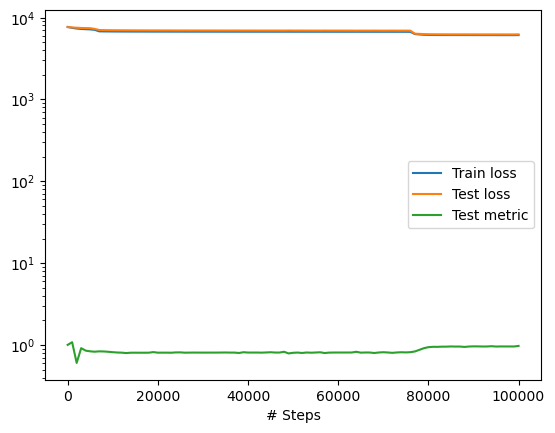

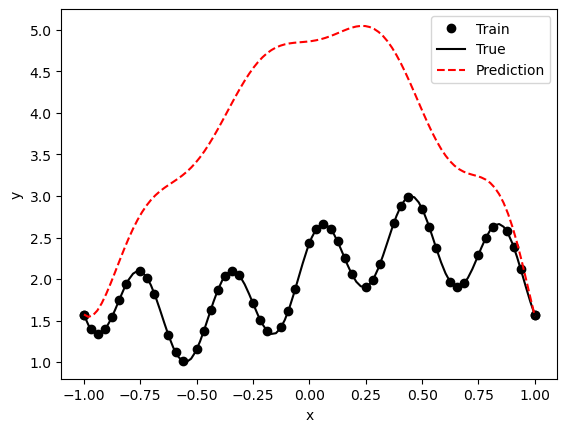

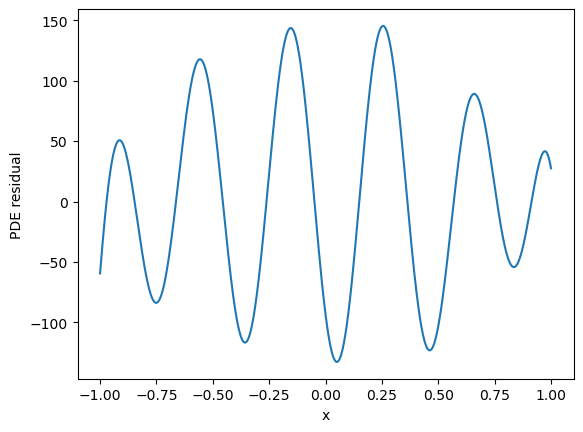

In [18]:
M =200
layer_size = [1] + [M]  + [20] + [1]

activation = ["sin", 'sin', 'linear']

initializer = "Glorot uniform"

net = dde.nn.FNN_copy(layer_size, activation, initializer, Rm=10)

model = dde.Model(data, net)
model.compile("adam", lr=0.001, metrics=["l2 relative error"])

losshistory, train_state = model.train(iterations=100000)

dde.saveplot(losshistory, train_state, issave=True, isplot=True)

x = geom.uniform_points(1000, True)
y = model.predict(x, operator=pde)
plt.figure()
plt.plot(x, y)
plt.xlabel("x")
plt.ylabel("PDE residual")
plt.show()